79.3488147480315
Current Airports: [(0.5275495555568133, 0.5435056911131101), (0.5316207107887612, 0.9557747747773889), (0.37337208304514613, 0.677569242756612)]
Updated Map
Updated Map
Aiports after Gradient Descent for 61 epochs:
 [(0.5718629217782581, 0.4138445518362038), (0.5478121636614125, 1.0375045720778735), (0.26774969578355606, 0.7053997323550251)]


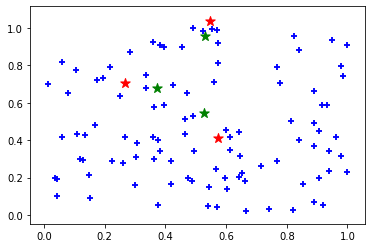

In [5]:
import random
import matplotlib.pyplot as plt

num_city = 100
num_air = 3
cities = set()
airports = []

for i in range(num_city):
    x = random.random()
    y = random.random()
    cities.add((x,y))
    
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))
    
def f():
    distance = 0
    for a in airports:
        for c in cities:
            distance += ((a[0] - c[0])**2) + ((a[1] - c[1])**2)
    return distance

print(f())

def showMap(c = "g"):
    print("Updated Map")
    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
    zip_airs = zip(*airports)
    plt.scatter(*zip_airs, marker='*', color=c, s=100, label='Airports')
    #plt.legend()
    plt
    

def split_cities():
    c1 = set()
    c2 = set()
    c3 = set()
    
    for c in cities:
        distanceA = ((airports[0][0] - c[0])**2) + ((airports[0][1] - c[1])**2)
        distanceB = ((airports[1][0] - c[0])**2) + ((airports[1][1] - c[1])**2)
        distanceC = ((airports[2][0] - c[0])**2) + ((airports[2][1] - c[1])**2)
        distances = [distanceA, distanceB, distanceC]
        if distanceA == min(distances):
            c1.add(c)
        elif distanceB == min(distances):
            c2.add(c)
        else:
            c3.add(c)
    return c1, c2, c3

c1, c2, c3 = split_cities()

print("Current Airports:",airports)
showMap()

"""
Calculates the gradient for each aiport and updates their location
Initial gradient is 0, and then the airports coordinates are passed in as the init
"""
def gradient_element(gradient = [0,0,0,0,0,0]):
    a = .0001
    for c in c1:
        gradient[0] += 2*(airports[0][0] - c[0])
        gradient[1] += 2*(airports[0][1] - c[1])
    for c in c2:
        gradient[2] += 2*(airports[0][0] - c[0])
        gradient[3] += 2*(airports[0][1] - c[1]) 
    for c in c3:
        gradient[4] += 2*(airports[0][0] - c[0])
        gradient[5] += 2*(airports[0][1] - c[1])
    return [(airports[0][0] - a*gradient[0],airports[0][1] - a*gradient[1]),(airports[1][0] - a*gradient[2], airports[1][1] - a*gradient[3]),( airports[2][0] - a*gradient[4],airports[2][1] - a*gradient[5])]


num = 0
epochs = random.randint(25,100)
for i in range(epochs):
    num += 1
    if(num == 0):
        f()
        c1,c2,c3 = split_cities()
        airports = gradient_element()
    else:
        f()
        c1,c2,c3 = split_cities()
        airports = gradient_element([airports[0][0],airports[0][1],airports[1][0],airports[1][1],airports[2][0],airports[2][1]])

showMap("r")
print("Aiports after Gradient Descent for",epochs,"epochs:\n",airports)

In [49]:
def run_GD():
num = 0
for i in range(20):
    num += 1
    if(num == 0):
        f()
        c1,c2,c3 = split_cities()
        airports = gradient_element()
    else:
        f()
        c1,c2,c3 = split_cities()
        airports = gradient_element([airports[0][0],airports[0][1],airports[1][0],airports[1][1],airports[2][0],airports[2][1]])
    return airports
airports = run_GD()
showMap("Updated Map")
print("Aiports after Gradient Descent",airports)



UnboundLocalError: local variable 'airports' referenced before assignment

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

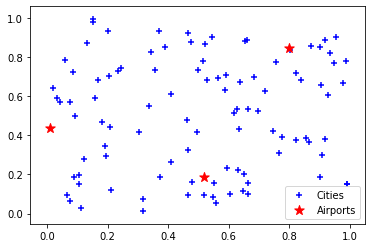

In [12]:
import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

The objective function is given by $f(x_1,y_1,x_2,y_2,x_3,y_3)=\sum_{i=1}^n\sum_{c\in C_i}(x_i-x_c)^2+(y_i-y_c)^2$ where $n$ is the number of the airports and $C_i$ is the set of cities whose closest airport is airport $i$. The goal of the program is determining the locations of airports that minimize the objective function using gradient based optimizatoin. 

The gradient of the objective function is $\nabla f(x_1,y_1,x_2,y_2,x_3,y_3)=\big(2\sum_{c\in C_1}(x_1-x_c),2\sum_{c\in C_1}(y_1-y_c),2\sum_{c\in C_2}(x_2-x_c),2\sum_{c\in C_2}(y_2-y_c),2\sum_{c\in C_3}(x_3-x_c),2\sum_{c\in C_3}(y_3-y_c)\big)$

By updating $(x_1,y_1,x_2,y_2,x_3,y_3)\gets (x_1,y_1,x_2,y_2,x_3,y_3)-\alpha \nabla f(x_1,y_1,x_2,y_2,x_3,y_3)$ where $0<\alpha\ll1$ is a constant, **find the optimal locations of the airports $(x_1,y_1,x_2,y_2,x_3,y_3)$.**

Every time the locations of the airports are updated, **plot the objective value as shown in the figure**.

<Note: The objective values may be different than the example.>
<img src="airports_loss.png" style="width:400px">